In [35]:
##Install Pytorch
!pip3 install torch==1.8.2+cu111 torchvision==0.9.2+cu111 torchaudio===0.8.2 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

Looking in links: https://download.pytorch.org/whl/lts/1.8/torch_lts.html


In [36]:
#Install sentencepiece for Pegasus Tokenizer
!pip3 install sentencepiece

In [37]:
#Install Transformmers for using Hugging face Pegasus-xsum model
!pip3 install transformers

##Scrape Scientific Article 

In [41]:
##Import BeautifulSoup libraries
from bs4 import BeautifulSoup
import requests

In [54]:
url='https://ai.googleblog.com/2022/03/auto-generated-summaries-in-google-docs.html'
response=requests.get(url)

<!DOCTYPE html>
<html class="v2 detail-page" dir="ltr" itemscope="" itemtype="http://schema.org/Blog" lang="en" xmlns="http://www.w3.org/1999/xhtml" xmlns:b="http://www.google.com/2005/gml/b" xmlns:data="http://www.google.com/2005/gml/data" xmlns:expr="http://www.google.com/2005/gml/expr">
 <head>
  <link href="https://www.blogger.com/static/v1/widgets/1529571102-css_bundle_v2.css" rel="stylesheet" type="text/css"/>
  <title>
   Google AI Blog: Auto-generated Summaries in Google Docs
  </title>
  <meta content="width=device-width, height=device-height, minimum-scale=1.0, initial-scale=1.0, user-scalable=0" name="viewport"/>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
  <meta content="article" property="og:type"/>
  <meta content="Auto-generated Summaries in Google Docs" property="og:title"/>
  <meta content="http://2.bp.blogspot.com/-qRz-hnwUdY4/WulXSQ6Rv4I/AAAAAAAATvQ/shk7KsphA0c3E3nUMsDVASqYaH0PhLPNwCK4BGAYYCw/s1600/GoogleAI_logo_horizontal_color_rgb.png" property="og:im
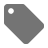
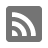
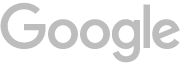

In [55]:
#Perse content
soup=BeautifulSoup(response.text, 'html')
print(soup.prettify())

In [59]:
##Extract required Titles and text
results=soup.find_all(['h1',h2','p','b'])
results

[<h2 class="title" itemprop="name">
 <a href="http://ai.googleblog.com/2022/03/auto-generated-summaries-in-google-docs.html" itemprop="url" title="Auto-generated Summaries in Google Docs">
 Auto-generated Summaries in Google Docs
 </a>
 </h2>, <p>
 For many of us, it can be challenging to keep up with the volume of documents that arrive in our inboxes every day: reports, reviews, briefs, policies and the list goes on. When a new document is received, readers often wish it included a brief summary of the main points in order to effectively prioritize it. However, composing a document summary can be cognitively challenging and time-consuming, especially when a document writer is starting from scratch.
 </p>, <p>
 To help with this, we recently <a href="https://cloud.google.com/blog/products/workspace/delivering-new-innovations-in-google-workspace-with-smart-canvas">announced</a> that Google Docs now automatically generates suggestions to aid document writers in creating content summaries

In [60]:
## Remove all the label from the text and joined back text
text=[result.text for result in results]
Article=' '.join(text)
Article

'\n\nAuto-generated Summaries in Google Docs\n\n \nFor many of us, it can be challenging to keep up with the volume of documents that arrive in our inboxes every day: reports, reviews, briefs, policies and the list goes on. When a new document is received, readers often wish it included a brief summary of the main points in order to effectively prioritize it. However, composing a document summary can be cognitively challenging and time-consuming, especially when a document writer is starting from scratch.\n \nTo help with this, we recently announced that Google Docs now automatically generates suggestions to aid document writers in creating content summaries, when they are available. Today we describe how this was enabled using a machine learning (ML) model that comprehends document text and, when confident, generates a 1-2 sentence natural language description of the document content. However, the document writer maintains full control — accepting the suggestion as-is, making necessar

Perforrm Abstractive Summarization using Pegasus-xsum

In [68]:
##Import Dependencies
from transformers import PegasusForConditionalGeneration,PegasusTokenizer

In [69]:
#Create tokenizer
tokenizer = PegasusTokenizer.from_pretrained('google/pegasus-xsum')


In [71]:
##Create Tokens - number representation of our text
tokens=tokenizer(Article,truncation=True,padding="longest",return_tensors="pt")

In [70]:
#Load model
model=PegasusForConditionalGeneration.from_pretrained("google/pegasus-xsum")

In [72]:
tokens

{'input_ids': tensor([[ 3339,   121, 22932, 95577,   115,  1058, 30556,   321,   223,   113,
           214,   108,   126,   137,   129,  2782,   112,   376,   164,   122,
           109,  2410,   113,  2010,   120,  3041,   115,   150,   115, 25347,
           290,   242,   151,  1574,   108,  1558,   108, 45939,   108,  2154,
           111,   109,   467,  1168,   124,   107,   434,   114,   177,  2199,
           117,   915,   108,  2557,   432,  1216,   126,   953,   114,  3598,
          5627,   113,   109,   674,   884,   115,   385,   112,  2448, 17195,
           126,   107,   611,   108, 14560,   114,  2199,  5627,   137,   129,
         80908,  2782,   111,   166,   121, 14499,   108,   704,   173,   114,
          2199,  2678,   117,  1215,   135,  5932,   107,   413,   225,   122,
           136,   108,   145,   938,  1487,   120,  1058, 30556,   239,  2093,
         11457,  3620,   112,  2637,  2199,  3655,   115,  1125,   601, 27533,
           108,   173,   157,   127,  

In [73]:
#Summarize
summary= model.generate(**tokens)

In [74]:
{**tokens}

{'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [75]:
#Decode summary
tokenizer.decode(summary[0])

'In our latest blog post, we describe how Google Docs now automatically generates suggestions to aid document writers in creating content summaries, when they are available.'

**Perforrm Abstractive Summarization using Pegasus-learge model**

In [76]:
#Create Tokenizar using Pegasus-large model
tokenizer = PegasusTokenizer.from_pretrained('google/pegasus-large')

In [78]:
##Create Tokens - number representation of our text
tokens=tokenizer(Article,truncation=True,padding="longest",return_tensors="pt")

In [77]:
#Load model
model=PegasusForConditionalGeneration.from_pretrained("google/pegasus-large")

In [79]:
tokens

{'input_ids': tensor([[ 3339,   121, 22932,  ...,   109,   617,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1]])}

In [80]:
#Summarize
summary= model.generate(**tokens)

In [81]:
{**tokens}

{'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1]]),
 'input_ids': tensor([[ 3339,   121, 22932,  ...,   109,   617,     1]])}

In [82]:
##Output/summary in tokens
summary[0]

tensor([    0,  4870,  8247, 57336,  3943, 27533,   192,   146,   129,   433,
          347,   109,  6550,  8628,   115, 22099,   118,   710,  1261,  1301,
          143,  1400, 25703,   158,   111,   710,  1261,  2233,   143, 21297,
         1064,   158,   204,   109,   555,   668,   231,   108,   704,   122,
          109,  3709,   113, 51979,   111, 51881,   107,   222,   813,   121,
        83465,   761,   108,   114,   861, 23153,   112,  1138,   423,  3912,
          113,  1596, 53541,   335,   112,  1976, 16067,   108,   167,   109,
        15519,   113, 38979,  1600,   140,   146,   505,   112,  2838,  2205,
          109,   449,   121,  1313,   121,   544,   121,  3904,   115,  2199,
         5906,  6520,  3884,   107,   222,   813,   121, 83465,   761,   108,
          114,   861, 23153,   112,  1138,   423,  3912,   113,  1596, 53541,
          335,   112,  1976, 16067,   108,   167,   109, 15519,   113, 38979,
         1600,   140,   146,   505,   112,  2838,  2205,   109, 

In [83]:
#Decode summary
tokenizer.decode(summary[0])

'Model Details Automatically generated summaries would not be possible without the tremendous advances in ML for natural language understanding (NLU) and natural language generation (NLG) over the past five years, especially with the introduction of Transformer and Pegasus. In self-supervised learning, a model learns to apply large amounts of unlabeled data to train sufficiently, so the advent of Transformers alone was not enough to significantly advance the state-of-the-art in document summarization. In self-supervised learning, a model learns to apply large amounts of unlabeled data to train sufficiently, so the advent of Transformers alone was not enough to significantly advance the state-of-the-art in document summarization. In self-supervised learning, a model learns to apply large amounts of unlabeled data to train sufficiently, so the advent of Transformers alone was not enough to significantly advance the state-of-the-art in document summarization. In self-supervised learning, 